# Evaluation of resident time #

Formula to evaluate ideal resident time for 1 reactor
$$ E(t)=\dfrac{1}{\tau}e^{-t/\tau} $$ 

Where $ \tau=\dfrac{Q}{V} $ where $Q$ is the volumetric flow rate and $V$ is the Volume.

Formula to evaluate ideal comulative time
$$ F(t) = 1-e^{-t/\tau} $$

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import glob
import matplotlib.pyplot as plt 

### Algae load impact ###
Reading Numerical simualtions files

In [2]:
#WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT'
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT\Baseline_Geometry'
scenario='Algae_load'
#baseline='Baseline'
file_path=os.path.join(WorkingDir,scenario,'*.his')
files=glob.glob(file_path)
#Base_file=os.path.join(WorkingDir,baseline,'RTD-baseline.his')
#files.append(Base_file)

In [3]:
files

['C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Algae_load\\RTD-outlet-AL_005.his',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Algae_load\\RTD-outlet-AL_015.his',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Algae_load\\RTD-outlet-AL_045.his']

In [4]:
data_frames={}  #create dictionary

In [5]:
time_array={}
RTD_array={}
N_particles={}

In [6]:
cases = ['0.3*baseline','baseline','3*baseline']

In [7]:
for file, dim in zip (files, cases):
    #cases.append(dim)
    data_frames[dim]=pd.read_csv(file, sep=' ', skiprows=11 , names=['t_num','E_num'])
    data_frames[dim]=data_frames[dim].iloc[:-1,:]
    N_particles[dim]=data_frames[dim]['E_num'].sum()
    print(N_particles[dim])
    time_array[dim]=data_frames[dim]['t_num'].to_numpy(dtype='float64')
    RTD_array[dim]=data_frames[dim]['E_num'].to_numpy(dtype='float64')/ N_particles[dim]

3966.0
3970.0
3968.0


In [8]:
N_particles

{'0.3*baseline': 3966.0, 'baseline': 3970.0, '3*baseline': 3968.0}

In [9]:
RTD_array
cases

['0.3*baseline', 'baseline', '3*baseline']

## Characteristic of the reactor ##

In [10]:
#Q= 0.000347/1020   # m^3/s
Q= 2.31/998
V=3.2*2.5*3.0 # be carefull with units 
tau=V/Q
print(tau)

10368.83116883117


In [11]:
t=np.linspace (0, 65000,100)

In [12]:
E_t=(1/tau)*np.exp(-t/tau)

In [13]:
F_t=1-np.exp(-t/tau)

In [14]:
teta=t/tau
E_teta=np.exp(-teta)
E_teta_2=teta*np.exp(-teta)

In [15]:
I0={}
I1={}
tau_num={}

In [16]:
for case in cases:
    I0[case]=sp.integrate.simpson(RTD_array[case],time_array[case],axis=0)
    I1[case]=sp.integrate.simpson(RTD_array[case]*time_array[case],time_array[case],axis=0)
    tau_num[case]=I1[case]/I0[case]
    RTD_array[case]=RTD_array[case]/I0[case]

In [17]:
tau_num

{'0.3*baseline': 11509.19088247238,
 'baseline': 11496.34190233382,
 '3*baseline': 11535.788762684355}

In [18]:
I1

{'0.3*baseline': 16971583.874683294,
 'baseline': 16512347.432281733,
 '3*baseline': 17015073.224044815}

## Figure template ##

Define a dictionari for the color and a dictionary for the line stile to be used

In [20]:
col={
    cases[0]:'b',
    cases[1]:'m',
    cases[2]:'c',
    #cases[3]:'g'
}
stile={
    cases[0]:'o',
    cases[1]:'v',
    cases[2]:'s',
    #cases[3]:'*'
}

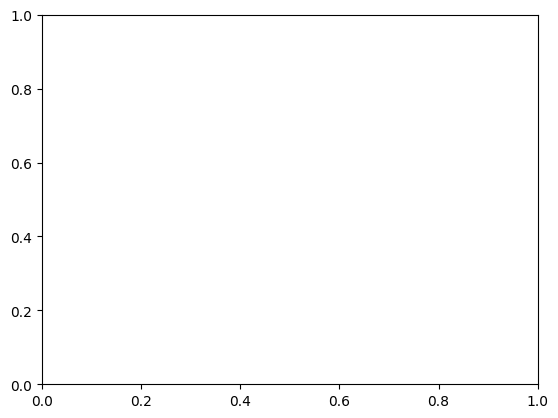

In [21]:
fig, ax = plt.subplots()

In [22]:
plt.ioff()

In [23]:
fig, ax3 = plt.subplots()

In [24]:
ax3.plot(teta, E_t*tau,label='Ideal')
ax3.plot(teta,E_teta_2, label='Ideal-N=2')
for case in cases:
    #ax3.plot(time_array[case]/tau_num[case],RTD_array[case]*tau_num[case],label=case,marker=stile[case],linestyle='--',color=col[case])
    ax3.plot(time_array[case]/tau,RTD_array[case]*tau,label=case,marker=stile[case],linestyle='--',color=col[case])

In [25]:
ax3.legend()
ax3.set_xlabel(r'$ \theta $')
ax3.set_ylabel(r'E( $ \theta $ )')
ax3.title.set_text('RTD')

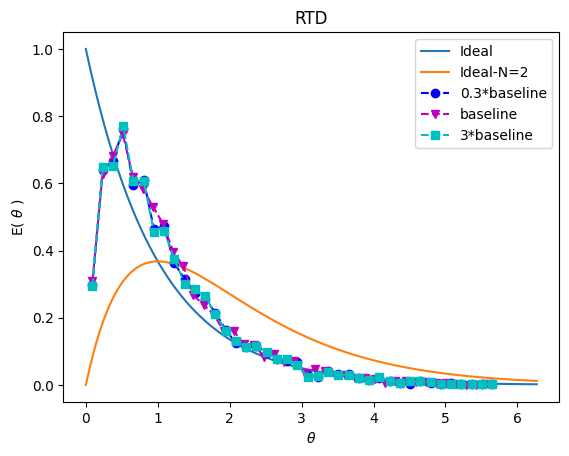

In [26]:
plt.show()

In [27]:
tau_num

{'0.3*baseline': 11509.19088247238,
 'baseline': 11496.34190233382,
 '3*baseline': 11535.788762684355}